<a href="https://colab.research.google.com/github/chiusanghung/AI/blob/main/CNN_Food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical, load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Normalization
import keras.backend as K
from keras.layers import LeakyReLU
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.optimizers import Adam

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Preprocessing để Training 
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
train_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/AI/Food/Traning', target_size = (30,40), batch_size = 32, class_mode = 'categorical')

Found 10 images belonging to 10 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True
                                  )
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/AI/Food/Test', target_size = (30,40), batch_size = 32, class_mode = 'categorical')

Found 10 images belonging to 10 classes.


In [6]:

training_set.class_indices


{'Bánh mì': 0,
 'Bánh xèo': 1,
 'Bún bò': 2,
 'Bún chả': 3,
 'Bún đậu': 4,
 'Chè': 5,
 'Cơm tấm': 6,
 'Mì xào': 7,
 'Phở bò': 8,
 'Xôi': 9}

In [7]:
test_set.class_indices

{'Bánh mì': 0,
 'Bánh xèo': 1,
 'Bún bò': 2,
 'Bún chả': 3,
 'Bún đậu': 4,
 'Chè': 5,
 'Cơm tấm': 6,
 'Mì xào': 7,
 'Phở bò': 8,
 'Xôi': 9}

In [8]:
# Tạo model
model = Sequential()
#Thêm lớp chuyển đổi
model.add(tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=[30,40,3],padding='same')) #3 kênh màu RGB
model.add(tf.keras.layers.Conv2D(32,(3,3), activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.1))
#Pooling
model.add(MaxPooling2D(pool_size=(2,2) , padding = 'same'))
#Tích chập lớp thứ 2
model.add(Conv2D(64,(3,3), activation = 'relu',padding='same'))
model.add(Conv2D(64,(3,3), activation = 'relu',padding='same'))
model.add(Dropout( 0.1))
model.add(MaxPooling2D(pool_size=(2,2) , padding = 'same'))

model.add(Conv2D(128,(3,3), activation = 'relu',padding='same'))
model.add(Conv2D(128,(3,3), activation = 'relu',padding='same'))
model.add(LeakyReLU(alpha = 0.2))
model.add(MaxPooling2D(pool_size=(2,2) , padding = 'same'))
#Làm phẳng
model.add(Flatten())
  # ANN Layer
#Connect
model.add(Dense(128, activation='relu'))
model.add(LeakyReLU(alpha = 0.2))
model.add(Dense(32, activation='relu'))
model.add(LeakyReLU(alpha = 0.1))

#Output
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 40, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 40, 32)        9248      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 30, 40, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 20, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 20, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 15, 20, 64)        36928     
                                                        

In [9]:
# Thiết lập thông số
from keras.optimizers import Adam
model.compile( loss = 'categorical_crossentropy', optimizer=Adam(), metrics = ['accuracy'])

In [10]:
# Huấn luyện
model.compile( loss = 'categorical_crossentropy', optimizer=Adam(), metrics = ['accuracy'])
# fit the model
a = model.fit_generator( training_set, validation_data=test_set, epochs=80, steps_per_epoch=len(training_set), validation_steps=len(test_set))

<ipython-input-10-eb5857a978ab>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  a = model.fit_generator( training_set, validation_data=test_set, epochs=80, steps_per_epoch=len(training_set), validation_steps=len(test_set))


Epoch 1/80
1/1 [==============================] - 5s 5s/step - loss: 2.3027 - accuracy: 0.1000 - val_loss: 2.2924 - val_accuracy: 0.2000
Epoch 2/80
1/1 [==============================] - 1s 667ms/step - loss: 2.2920 - accuracy: 0.2000 - val_loss: 2.2958 - val_accuracy: 0.1000
Epoch 3/80
1/1 [==============================] - 1s 685ms/step - loss: 2.2806 - accuracy: 0.1000 - val_loss: 2.2756 - val_accuracy: 0.2000
Epoch 4/80
1/1 [==============================] - 1s 694ms/step - loss: 2.2496 - accuracy: 0.2000 - val_loss: 2.2586 - val_accuracy: 0.1000
Epoch 5/80
1/1 [==============================] - 1s 680ms/step - loss: 2.1946 - accuracy: 0.2000 - val_loss: 2.2273 - val_accuracy: 0.3000
Epoch 6/80
1/1 [==============================] - 1s 673ms/step - loss: 2.1086 - accuracy: 0.3000 - val_loss: 2.1761 - val_accuracy: 0.1000
Epoch 7/80
1/1 [==============================] - 1s 674ms/step - loss: 2.0339 - accuracy: 0.1000 - val_loss: 2.0517 - val_accuracy: 0.2000
Epoch 8/80
1/1 [=======

In [16]:
model.evaluate(test_set)

1/1 [==============================] - 0s 300ms/step - loss: 0.0625 - accuracy: 1.0000


[0.06249383091926575, 1.0]

In [17]:
test_loss, test_acc = model.evaluate(test_set, verbose=False)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

Test loss: 8.572328567504883
Test accuracy: 0.6000000238418579


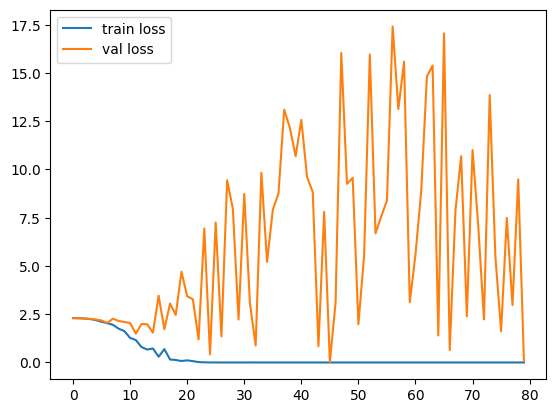

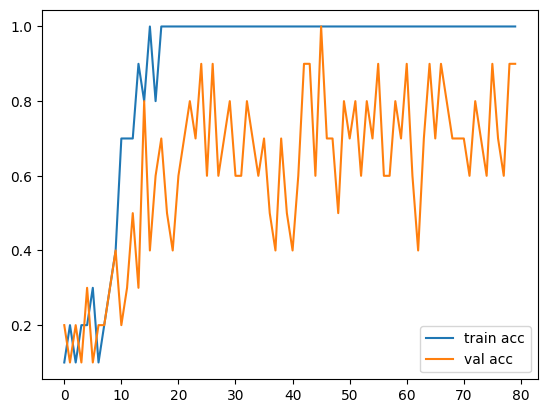

<Figure size 640x480 with 0 Axes>

In [20]:
#loss
plt.plot(a.history['loss'], label='train loss')
plt.plot(a.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

#accuracy
plt.plot(a.history['accuracy'], label='train acc')
plt.plot(a.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [25]:
model.save('/content/drive/MyDrive/AI/Food/model_inception.h5')

In [26]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
model=load_model('/content/drive/MyDrive/AI/Food/model_inception.h5')
model

In [28]:
import os
os.chdir('/content/drive/MyDrive/AI/Food/Valid')

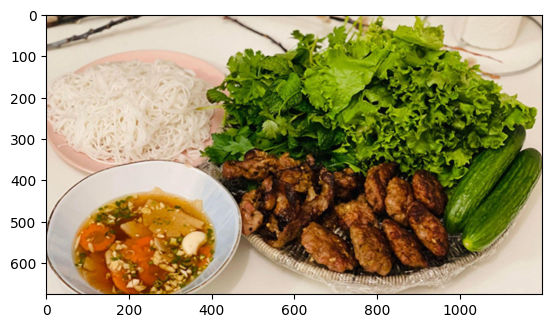

In [35]:
img_data = load_img('/content/drive/MyDrive/AI/Food/Valid/A0.jpg')
img_data = img_to_array(img_data)
plt.imshow(img_data/255)

Chọn image : A0
1/1 [==============================] - 0s 228ms/step
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
Bún chả
Chọn image : A1
1/1 [==============================] - 0s 27ms/step
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
Chè
Chọn image : A2
1/1 [==============================] - 0s 31ms/step
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Bún đậu
Chọn image : A3
1/1 [==============================] - 0s 28ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Xôi
Chọn image : A4
1/1 [==============================] - 0s 50ms/step
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
Cơm tấm
Chọn image : A5
1/1 [==============================] - 0s 30ms/step
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
Mì xào
Chọn image : A6
1/1 [==============================] - 0s 28ms/step
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Bánh mì
Chọn image : A7
1/1 [==============================] - 0s 27ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
Phở bò
Chọn image : A8
1/1 [==============================] - 0s 27ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
Bún bò
Chọn image : A9
1/1 

KeyboardInterrupt: ignored

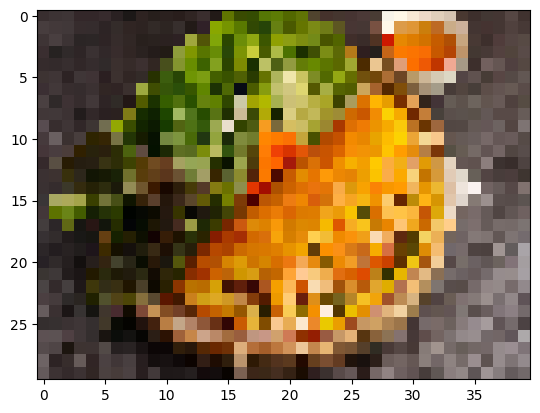

In [33]:
import numpy as np
from keras.preprocessing import image
while 1 :
 ch = input('Chọn' ' image : ')
 if (ch=='-'):
     break
 else:
   try: 
     test_image = load_img("/content/drive/MyDrive/AI/Food/Valid/{}.jpg".format(ch),
                             target_size=(30,40)) #Scale
     test_image = img_to_array(test_image)
     plt.imshow(test_image/255)
     test_image = np.expand_dims(test_image,axis=0)
     result = model.predict(test_image)
     training_set.class_indices
     print(result)
     x=0
     c=0
     i=0
     while (i<10):
       if result[0][i]>=x:
         x=result[0][i]
         c=i
        
       i=i+1
     if (x==0 and c==9) :
         c=10
     if c == 0:
       prediction = 'Bánh mì'
     elif c == 1:
       prediction = 'Bánh xèo'
     elif c == 2:
       prediction = 'Bún bò'
     elif c == 3:
       prediction = 'Bún chả'
     elif c == 4:
       prediction = 'Bún đậu'
     elif c==5:
       prediction ='Chè'
     elif c == 6:
       prediction = 'Cơm tấm'
     elif c == 7:
       prediction = 'Mì xào'
     elif c == 8:
       prediction = 'Phở bò'
     elif c==9:
       prediction ='XôiAAA'
           
     print(prediction)
   except:
      print('Tên của hình ảnh không tồn tại '  )